## Lab 3 - Galactic rotation

In [28]:
import matplotlib.pyplot as plt 
import numpy as np

In [29]:
Rsun = 8 # kpc
vsun = 220000 # m/s

### longitude l [°] and velocity v [m/s]

In [30]:
l = np.array([89.99255, 87.997854, 86.01696, 84.00906, 81.99759, 80.07000, 77.95953, 75.99178, 73.99966, 71.99348, 70.00052, 68.00550, 65.99581, 63.98956, 61.99490, 59.99985, 59.00081, 58.00152, 57.00221, 55.97966, 55.00358, 54.00439, 53.00506, 52.00572, 51.00638, 49.99318, 48.98937, 47.99001, 46.99065, 45.99129, 44.99192, 43.99976, 42.99103, 41.99575, 41.01899, 39.99680, 39.01774, 37.99479, 36.99507, 35.99536, 34.99564, 33.99591, 32.99619, 31.99646, 30.99673, 29.99700, 28.99726, 27.99752, 26.99778, 25.99804, 24.99830, 23.99855, 22.99881, 21.99907, 20.99932, 19.99957, 18.99027, 17.99058, 16.99088, 15.9911842, 15.01470, 13.99179, 12.99209, 11.96914])
v = np.array([4653.064, 4187.927, 5814.043, 7823.431, 7421.553, 8627.186, 8253.472, 7047.84, 6825.784, 8620.291, 8171.664, 8508.134, 19050.86, 21630.46, 27817.9, 38697.09, 33907.74, 31582.06, 36233.42, 38791.67, 39954.51, 56420.5, 62002.13, 62234.7, 52001.7, 59536.99, 64095.24, 62467.26, 62932.4, 59676.45, 58048.47, 63008.85, 70949.54, 65969.78, 72045.06, 70026.24, 81397.54, 80002.13, 85816.33, 80932.4, 85816.33, 95351.62, 95584.19, 100468.1, 109538.3, 106514.9, 98840.14, 101631, 95584.19, 107677.7, 98142.44, 101165.8, 107445.2, 109073.1, 121166.7, 119306.1, 123072.3, 128421.3, 129816.8, 139584.6, 139352, 150515.3, 145863.9, 149352.5])

In [31]:
Rmin = np.sin(l*np.pi/180) * Rsun # in kpc
v_Rmin = (v + vsun * np.sin(l*np.pi/180))/1000 # in km/s

In [46]:
s_l = 0.1
s_v = 1
s_Rmin = np.abs(s_l * np.cos(l*np.pi/180) * Rsun * np.pi/180)
s_vRmin = np.sqrt(s_v**2 + (s_l*vsun * np.cos(l*np.pi/180)* np.pi/180)**2 )/1000

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8'),
  Text(9.0, 0, '9')])

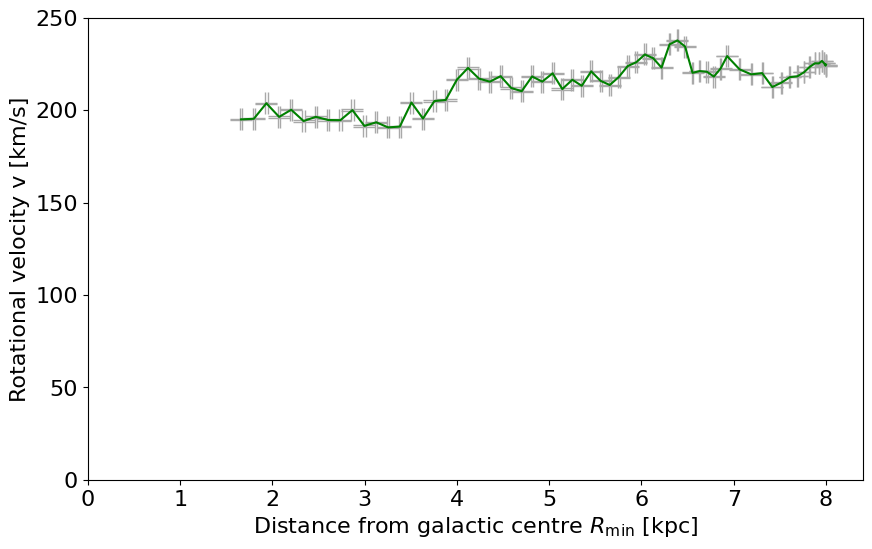

In [53]:
plt.figure(figsize=(10, 6))
plt.errorbar(Rmin,v_Rmin, xerr= s_Rmin, yerr=s_vRmin, color='darkgrey', linestyle='none', capsize=8)
plt.plot(Rmin,v_Rmin, color='green')
plt.ylim(0, 250)
plt.xlim(0, 8.4)
plt.xlabel(r'Distance from galactic centre $R_{\min}$ [kpc]', fontsize=16)
plt.ylabel('Rotational velocity v [km/s]', fontsize=16)

plt.savefig('zenith_angle_plot.png', dpi=300, bbox_inches='tight')
plt.yticks(fontsize=16) 
plt.xticks(fontsize=16)  

### Sun's orbital period around galactic centre

In [69]:
T = 2*np.pi*Rsun*3.086*10**19/(vsun) *1/(3600*24*365.25*10**6) # in million years
print(f'Sun\'s orbital period around galactic centre: {T}')

Sun's orbital period around galactic centre: 223.4287877400079


### Total mass of the Galaxy inside solar galactic orbit

In [71]:
M_sun = 1.98892 * 10 **30 # kg
M_galaxy = M_sun * vsun**2*Rsun*3.086*10**19 / (6.6743*10**(-11)) 
print(f'Total mass of the Galaxy inside solar galctic orbit: {M_galaxy}')

Total mass of the Galaxy inside solar galctic orbit: 3.560761303603374e+71


In [68]:
1.15*10**12*1.9*10**30

2.185e+42